# PAGAMENTO CARTÃO DE CRÉDITO (RANDOM FOREST)

## INTRODUÇÃO

*O presente projeto advém de um exercício de aprendizado de máquina do curso gratuito Microsoft Power BI Para Data Science, Versão 2.0 da Data Science Academy. Procurou-se construir um modelo de machine learning para prever a probabilidade de inadimplência no pagamento do cartão de crédito por clientes de um banco. Foram construídos três modelos, utilizando o algoritmo Random Forest.*
<br>


**Data Science Academy:** https://www.datascienceacademy.com.br/ <br>
**Dados:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## 1. CARREGANDO PACOTES E IMPORTANDO DADOS

In [1]:
# Pacotes
library(Amelia)
library(tidyverse)
library(caret)
library(reshape)
library(randomForest)
library(e1071)
library(DMwR)
library(gridExtra)

Warning message:
"package 'Amelia' was built under R version 3.6.3"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 
Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts -----------------------------------------

In [2]:
# Carregar dados 
df_clientes<- read.csv("dataset.csv")

In [3]:
# Sumário dos dados
summary(df_clientes)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

In [4]:
# Visualizar as seis primeiras linhas
head(df_clientes)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
# Visualizar as seis últimas linhas
tail(df_clientes)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
# Checar NAs
sapply(df_clientes, function(x) sum(is.na(x)))

ID                  LIMIT_BAL 
                         0                          0 
                       SEX                  EDUCATION 
                         0                          0 
                  MARRIAGE                        AGE 
                         0                          0 
                     PAY_0                      PAY_2 
                         0                          0 
                     PAY_3                      PAY_4 
                         0                          0 
                     PAY_5                      PAY_6 
                         0                          0 
                 BILL_AMT1                  BILL_AMT2 
                         0                          0 
                 BILL_AMT3                  BILL_AMT4 
                         0                          0 
                 BILL_AMT5                  BILL_AMT6 
                         0                          0 
                  PAY_AMT1                   PAY_AMT2 
                         0                          0 
                  PAY_AMT3                   PAY_AMT4 
                         0                          0 
                  PAY_AMT5                   PAY_AMT6 
                         0                          0 
default.payment.next.month 
                         0

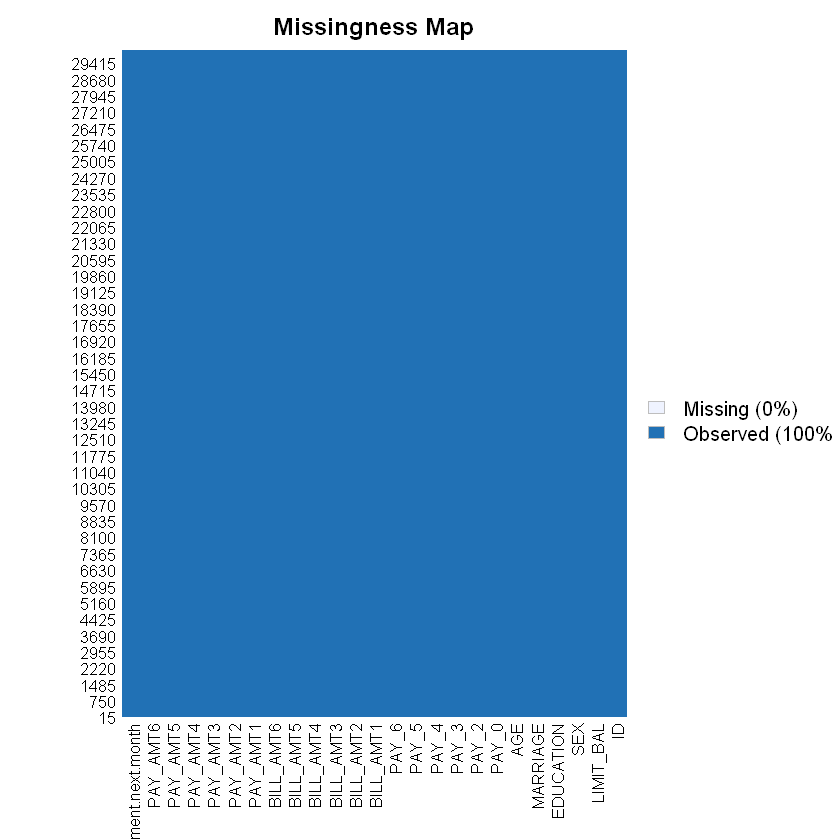

In [7]:
# Plotar NAs
missmap(df_clientes) 

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

### 2.1 Pré Conversão

In [8]:
# Remover primeira coluna - ID
df_clientes<- df_clientes[,-1]

In [9]:
# Renomear a a variável dependente - DEFAULTING
colnames(df_clientes) [24]<- "DEFAULTING"

In [10]:
# Transformar variaveis 
df_clientes$SEX<- factor(df_clientes$SEX,
                         levels = c(1,2),
                         labels = c("Male","Female"))

df_clientes$MARRIAGE<- factor(df_clientes$MARRIAGE,
                              levels = c(0,1,2,3),
                              labels=c("Unknown","Married","Single","Others"))

df_clientes$EDUCATION<- factor(df_clientes$EDUCATION,
                               levels = c(1,2,3,4),
                               labels = c("Graduate School", "University",
                                          "High School","Others"))
df_clientes$AGE<- cut(df_clientes$AGE,
                      c(0,30,50,100),
                      labels = c("Young","Adult","Old"))

df_clientes$PAY_0<- factor(df_clientes$PAY_0)
df_clientes$PAY_2<- factor(df_clientes$PAY_2)
df_clientes$PAY_3<- factor(df_clientes$PAY_3)
df_clientes$PAY_4<- factor(df_clientes$PAY_4)
df_clientes$PAY_5<- factor(df_clientes$PAY_5)
df_clientes$PAY_6<- factor(df_clientes$PAY_6)
df_clientes$DEFAULTING<- factor(df_clientes$DEFAULTING)

### 2.2 Pós Conversão

In [11]:
# Visualizando dados pós conversão
glimpse(df_clientes)

Rows: 30,000
Columns: 24
$ LIMIT_BAL  <int> 20000, 120000, 90000, 50000, 50000, 50000, 500000, 100000, ~
$ SEX        <fct> Female, Female, Female, Female, Male, Male, Male, Female, F~
$ EDUCATION  <fct> University, University, University, University, University,~
$ MARRIAGE   <fct> Married, Single, Single, Married, Married, Single, Single, ~
$ AGE        <fct> Young, Young, Adult, Adult, Old, Adult, Young, Young, Young~
$ PAY_0      <fct> 2, -1, 0, 0, -1, 0, 0, 0, 0, -2, 0, -1, -1, 1, 0, 1, 0, 0, ~
$ PAY_2      <fct> 2, 2, 0, 0, 0, 0, 0, -1, 0, -2, 0, -1, 0, 2, 0, 2, 0, 0, -2~
$ PAY_3      <fct> -1, 0, 0, 0, -1, 0, 0, -1, 2, -2, 2, -1, -1, 2, 0, 0, 2, 0,~
$ PAY_4      <fct> -1, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, -1, 0, 0, 0, 2, -1, ~
$ PAY_5      <fct> -2, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, 2, -1, ~
$ PAY_6      <fct> -2, 2, 0, 0, 0, 0, 0, -1, 0, -1, -1, 2, -1, 2, 0, 0, 2, -1,~
$ BILL_AMT1  <int> 3913, 2682, 29239, 46990, 8617, 64400, 367965, 11876, 11285~
$ BILL_AMT2  <i

In [12]:
# Checar NAs
sapply(df_clientes, function(x) sum(is.na(x)))

LIMIT_BAL        SEX  EDUCATION   MARRIAGE        AGE      PAY_0      PAY_2 
         0          0        345          0          0          0          0 
     PAY_3      PAY_4      PAY_5      PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3 
         0          0          0          0          0          0          0 
 BILL_AMT4  BILL_AMT5  BILL_AMT6   PAY_AMT1   PAY_AMT2   PAY_AMT3   PAY_AMT4 
         0          0          0          0          0          0          0 
  PAY_AMT5   PAY_AMT6 DEFAULTING 
         0          0          0

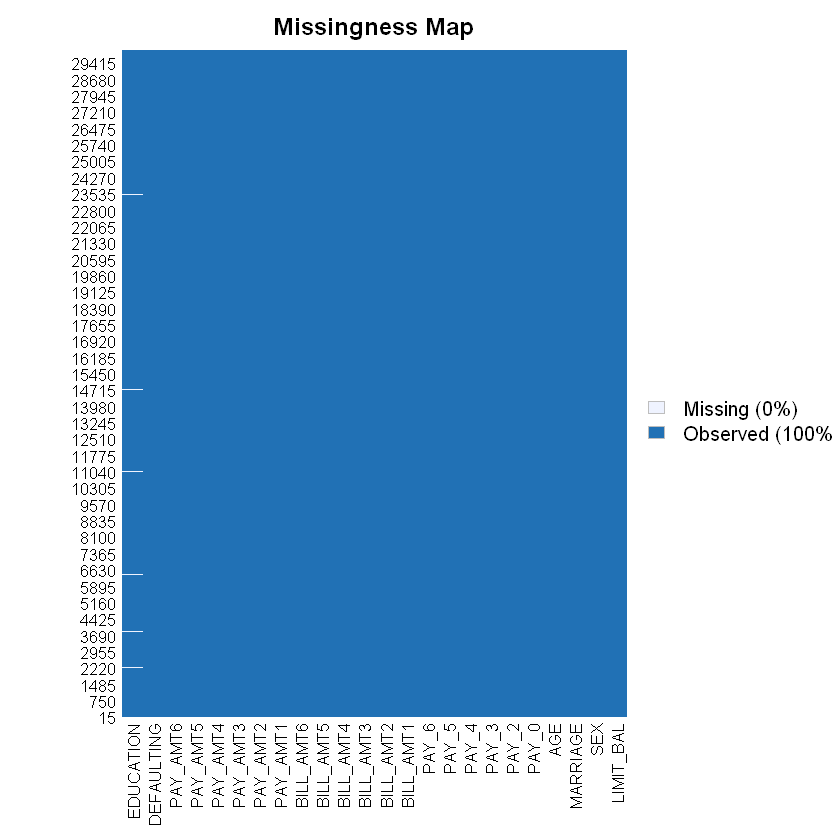

In [13]:
# Plot NAs
missmap(df_clientes)

In [14]:
# Omitir NAs
df_clientes<-na.omit(df_clientes)

In [15]:
# Contar valores da variável dependente - Defaulting
table(df_clientes$DEFAULTING)


    0     1 
23045  6610 

In [16]:
# Visualizar proporção variável dependente - Defaulting
prop.table(table(df_clientes$DEFAULTING))


        0         1 
0.7771034 0.2228966 

### 2.3 Visualizando as Variáveis

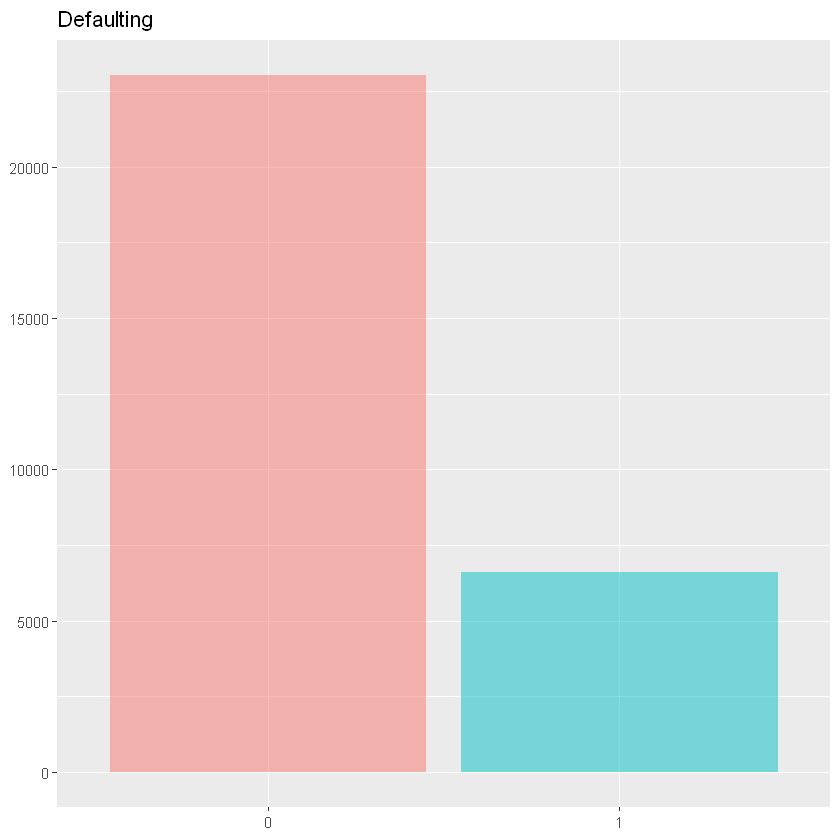

In [17]:
# Plotar variável dependente - Defaulting
df_clientes %>%
  ggplot(aes(DEFAULTING,fill=DEFAULTING)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Defaulting",x=NULL,y=NULL)

In [18]:
# Plotar variável Amount of the given credit
plot1<-df_clientes %>%
ggplot(aes(LIMIT_BAL)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of the Given Credit",x=NULL,y=NULL)

In [19]:
# Plotar variável Age
plot2<-df_clientes %>%
  ggplot(aes(AGE,fill=AGE)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Age",x=NULL,y=NULL)

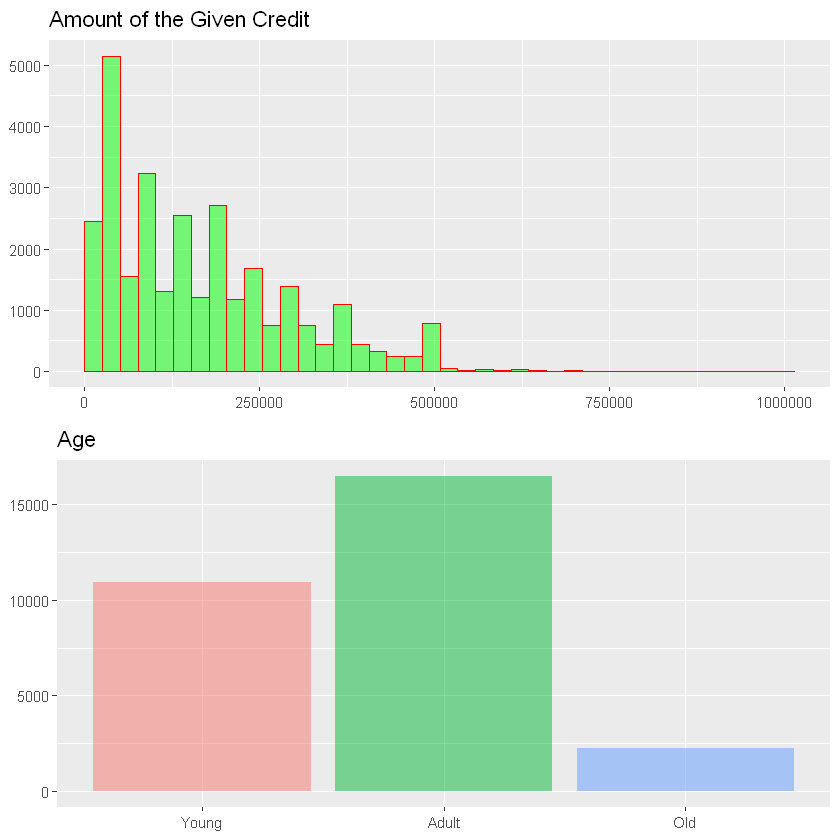

In [20]:
grid.arrange(plot1,plot2)

In [21]:
# Plot Marriage
plot3<-df_clientes %>%
ggplot(aes(MARRIAGE,fill=MARRIAGE)) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Marriage Status",x=NULL,y=NULL)

In [22]:
# Plot Education
plot4<-df_clientes %>%
ggplot(aes(EDUCATION,fill=EDUCATION)) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Education Level",x=NULL,y=NULL)

In [23]:
# Plot Sex
plot5<-df_clientes %>%
ggplot(aes(SEX,fill=SEX)) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Sex",x=NULL,y=NULL)

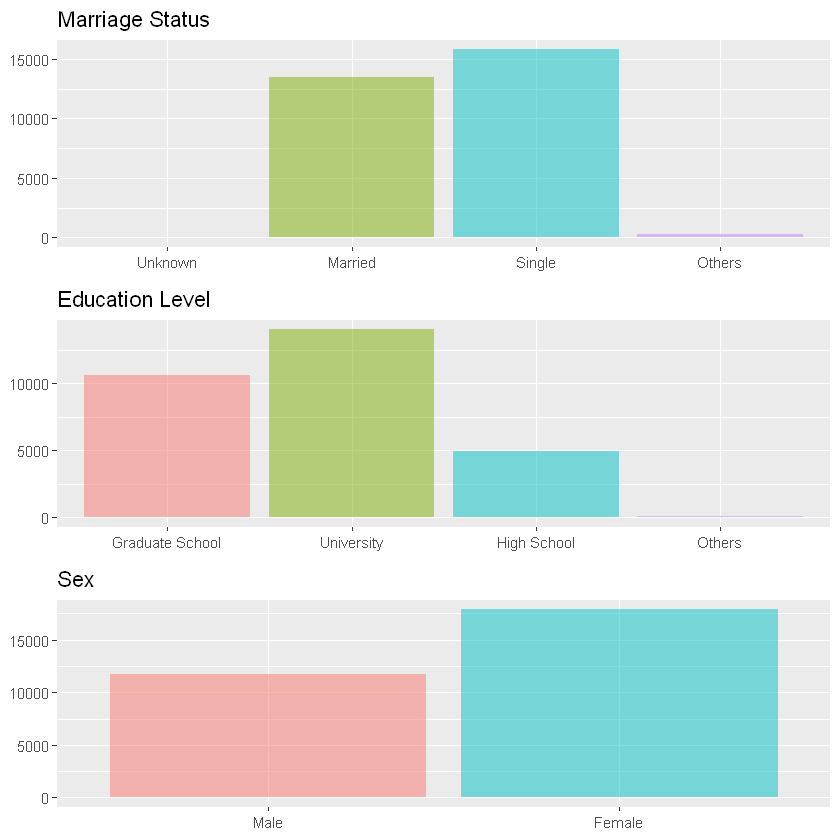

In [24]:
grid.arrange(plot3,plot4,plot5)

In [25]:
# Plotar variável Pay0
plot6<-df_clientes %>%
  ggplot(aes(PAY_0,fill=PAY_0)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay0",x=NULL,y=NULL)

In [26]:
# Plotar variável Pay2
plot7<-df_clientes %>%
  ggplot(aes(PAY_2,fill=PAY_2)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay2",x=NULL,y=NULL)

In [27]:
# Plotar variável Pay3
plot8<-df_clientes %>%
  ggplot(aes(PAY_3,fill=PAY_3)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay3",x=NULL,y=NULL)

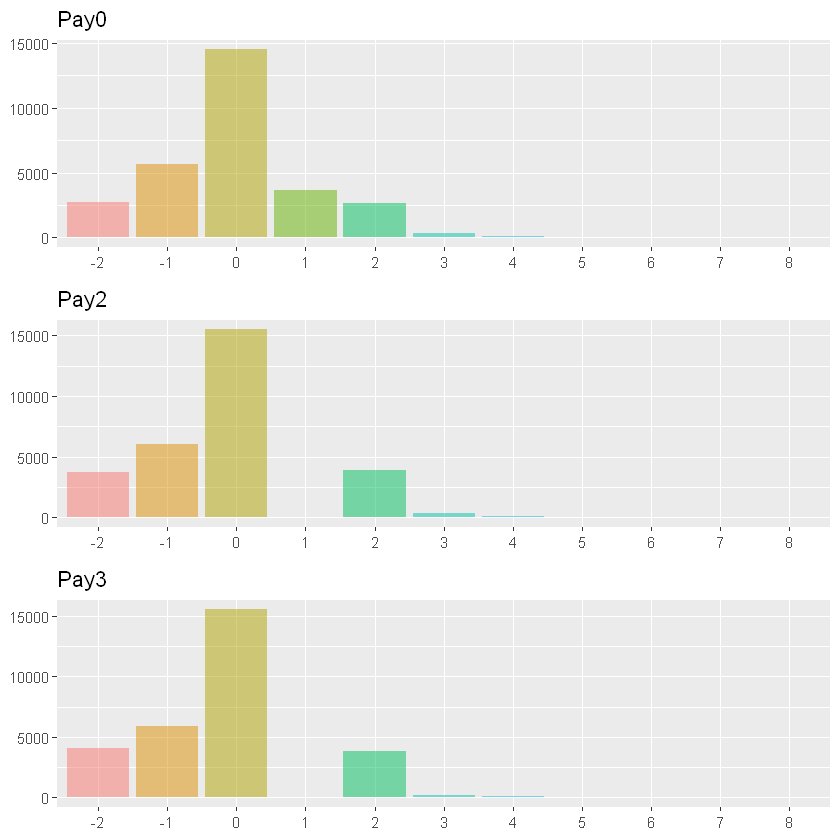

In [28]:
grid.arrange(plot6,plot7,plot8)

In [29]:
# Plotar variável Pay4
plot9<-df_clientes %>%
  ggplot(aes(PAY_4,fill=PAY_4)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay4",x=NULL,y=NULL)

In [30]:
# Plotar variável Pay5
plot10<-df_clientes %>%
  ggplot(aes(PAY_5,fill=PAY_5)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay5",x=NULL,y=NULL)

In [31]:
# Plotar variável Pay6
plot11<-df_clientes %>%
  ggplot(aes(PAY_6,fill=PAY_6)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay6",x=NULL,y=NULL)

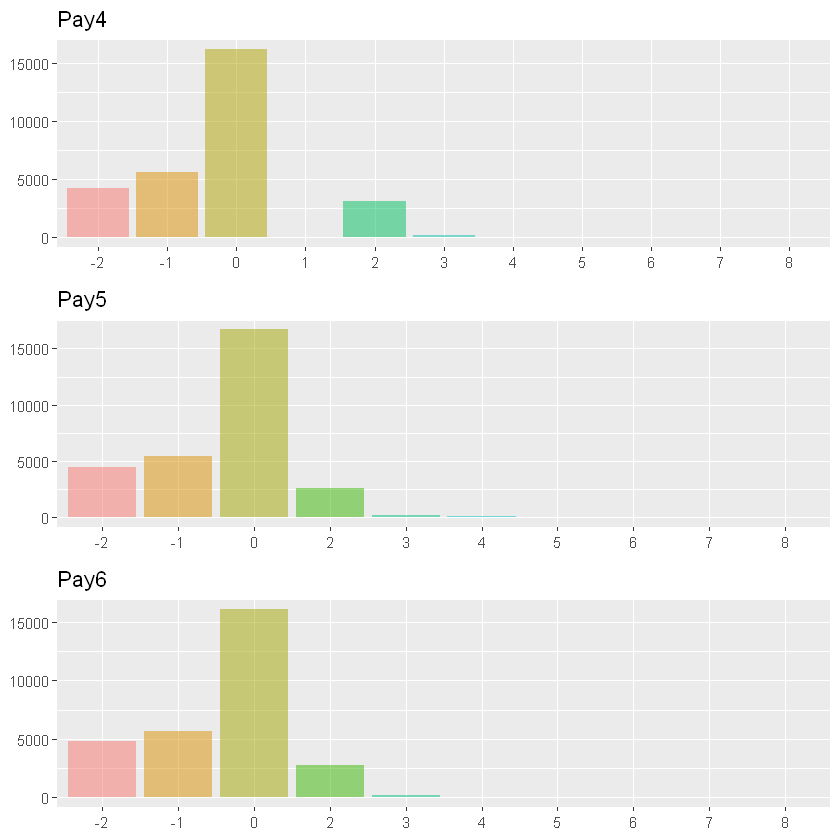

In [32]:
grid.arrange(plot9,plot10,plot11)

In [33]:
# Plotar variável Amount of Bill1
plot12<-df_clientes %>%
ggplot(aes(BILL_AMT1)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill1",x=NULL,y=NULL)

In [34]:
# Plotar variável Amount of Bill2
plot13<-df_clientes %>%
ggplot(aes(BILL_AMT2)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill2",x=NULL,y=NULL)

In [35]:
# Plotar variável Amount of Bill3
plot14<-df_clientes %>%
ggplot(aes(BILL_AMT3)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill3",x=NULL,y=NULL)

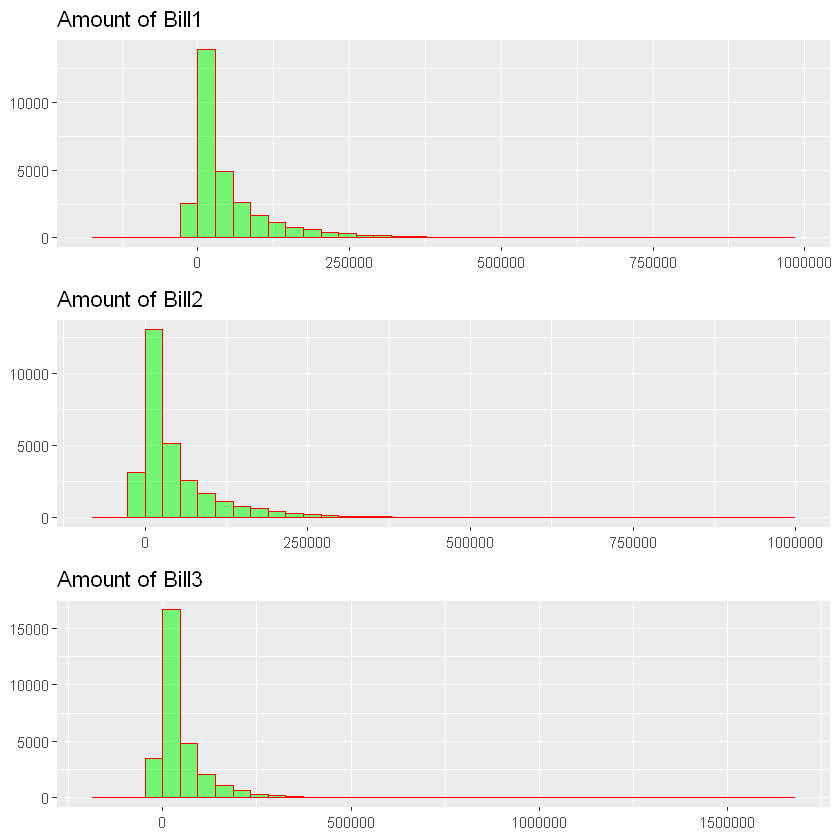

In [36]:
grid.arrange(plot12,plot13,plot14)

In [37]:
# Plotar variável Amount of Bill4
plot15<-df_clientes %>%
ggplot(aes(BILL_AMT4)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill4",x=NULL,y=NULL)

In [38]:
# Plotar variável Amount of Bill5
plot16<-df_clientes %>%
ggplot(aes(BILL_AMT5)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill5",x=NULL,y=NULL)

In [39]:
# Plotar variável Amount of Bill6
plot17<-df_clientes %>%
ggplot(aes(BILL_AMT6)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill6",x=NULL,y=NULL)

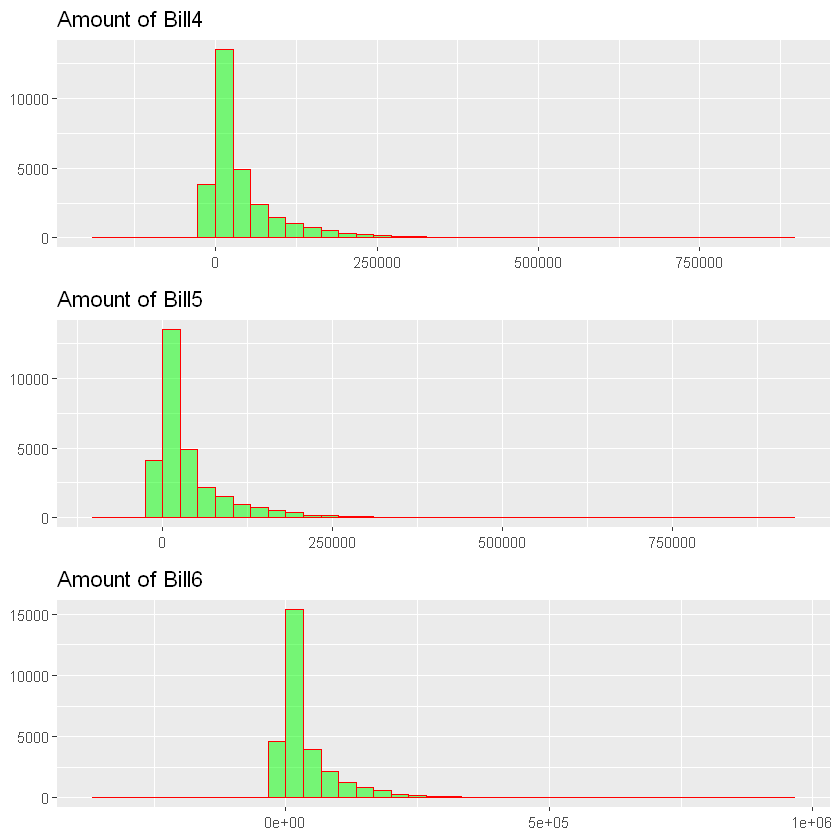

In [40]:
grid.arrange(plot15,plot16,plot17)

In [41]:
# Plotar variável  Amount of previous payment1
plot18<-df_clientes %>%
ggplot(aes(PAY_AMT1)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment1",x=NULL,y=NULL)

In [42]:
# Plotar variável  Amount of previous payment2
plot19<-df_clientes %>%
ggplot(aes(PAY_AMT2)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment2",x=NULL,y=NULL)

In [43]:
# Plotar variável  Amount of previous payment3
plot20<-df_clientes %>%
ggplot(aes(PAY_AMT3)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment3",x=NULL,y=NULL)

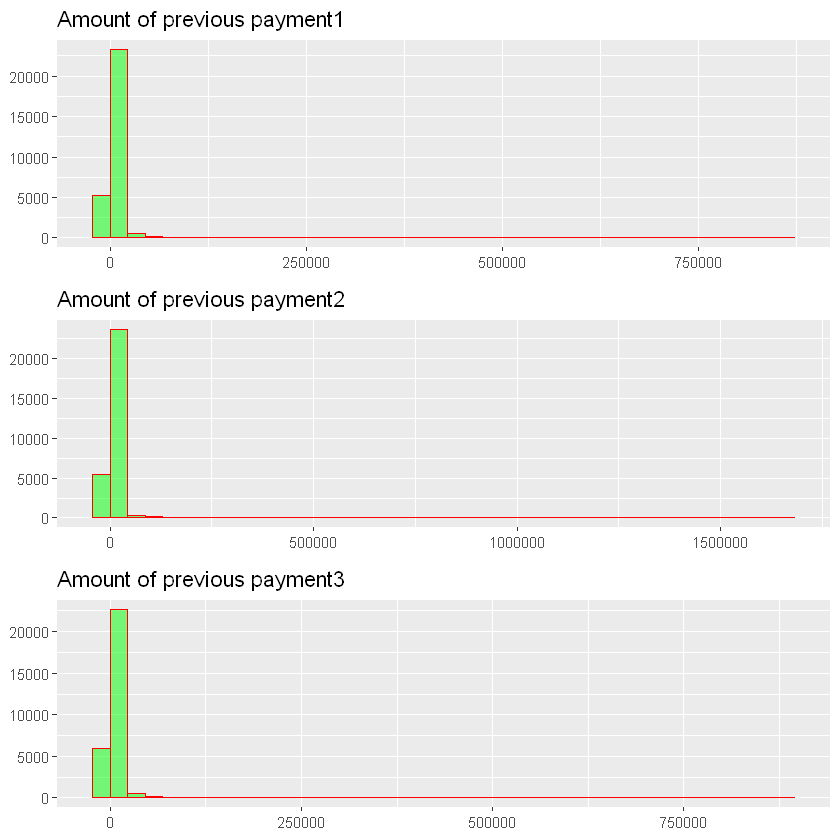

In [44]:
grid.arrange(plot18,plot19,plot20)

In [45]:
# Plotar variável  Amount of previous payment4
plot21<-df_clientes %>%
ggplot(aes(PAY_AMT4)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment4",x=NULL,y=NULL)

In [46]:
# Plotar variável  Amount of previous payment5
plot22<-df_clientes %>%
ggplot(aes(PAY_AMT5)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment5",x=NULL,y=NULL)

In [47]:
# Plotar variável  Amount of previous payment6
plot23<-df_clientes %>%
ggplot(aes(PAY_AMT6)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment6",x=NULL,y=NULL)

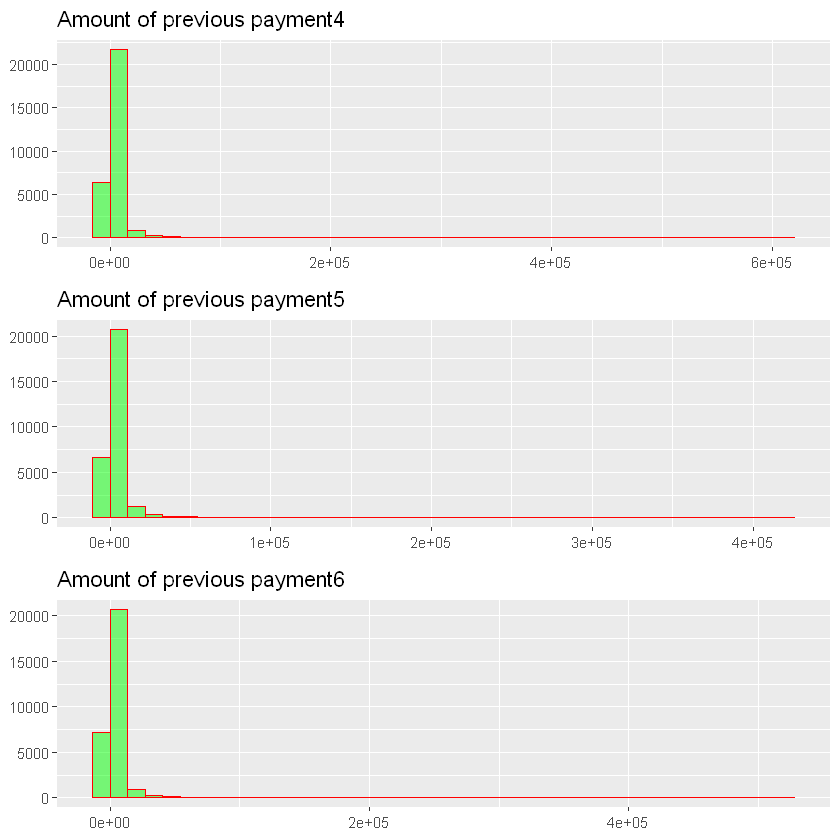

In [48]:
grid.arrange(plot21,plot22,plot23)

## 3. MACHINE LEARNING

### 3.1 Divisão dos dados

In [49]:
# Set seed
set.seed(12345)

In [50]:
# Definindo dados de treino
indice<- createDataPartition(df_clientes$DEFAULTING,
                             p=0.75, list=F)
df_treino<- df_clientes[indice,]

In [51]:
# Ver dimensão 
dim(df_treino)

[1] 22242    24

In [52]:
# Contar valores da variável dependente - Defaulting
table(df_treino$DEFAULTING)


    0     1 
17284  4958 

In [53]:
# Unir contagem base de treino e original
comparar_df<- cbind(prop.table(table(df_treino$DEFAULTING)),
                    prop.table(table(df_clientes$DEFAULTING)))
colnames(comparar_df)<- c("Treino", "Original")

In [54]:
# Converter colunas em linhas
melt_comparacao<- melt(comparar_df)

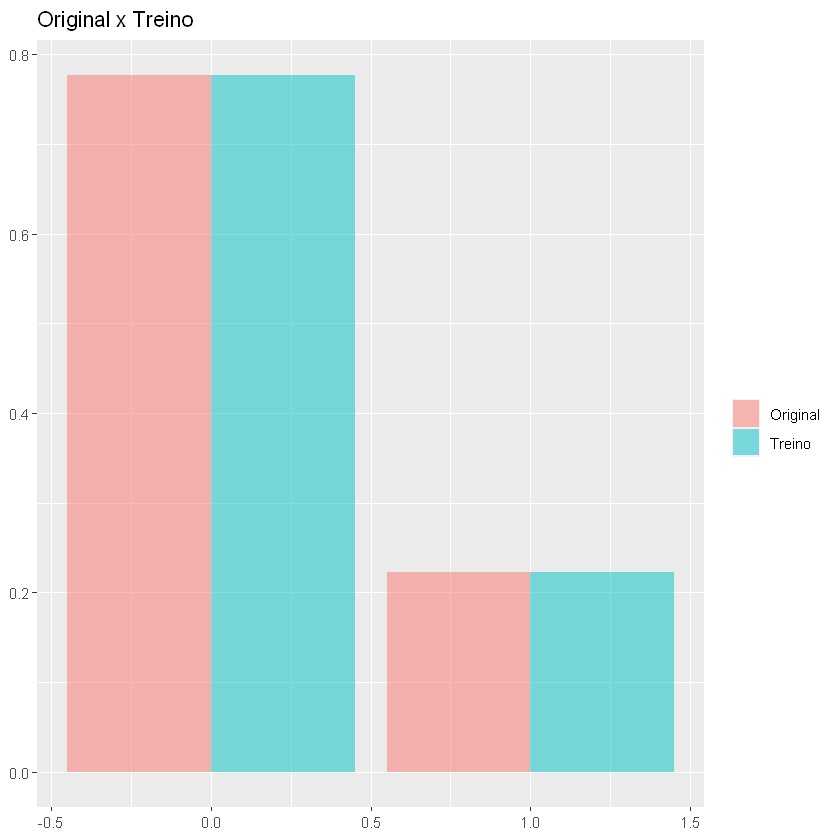

In [55]:
# Plotar base de treino e original
melt_comparacao %>%
  ggplot(aes(X1,value)) +
  geom_bar(aes(fill=X2),stat = "identity", position = "dodge",alpha=.5) +
labs(title="Original x Treino",x=NULL,y=NULL,fill=NULL)

In [56]:
# Definindo dados de teste
df_teste<- df_clientes[-indice,]

In [57]:
# Ver dimensão
dim(df_teste)

[1] 7413   24

### 3.2 Construindo Modelos

**1. Primeiro Modelo** <br>
- Modelo padrão utilizando a variável **Defaulting** como variável dependente e as restantes como independentes.

In [58]:
# Primeira versão do modelo
modelo_v1<- randomForest(DEFAULTING ~., df_treino)

In [59]:
# Ver modelo 1
modelo_v1


Call:
 randomForest(formula = DEFAULTING ~ ., data = df_treino) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 18.21%
Confusion matrix:
      0    1 class.error
0 16338  946   0.0547327
1  3105 1853   0.6262606

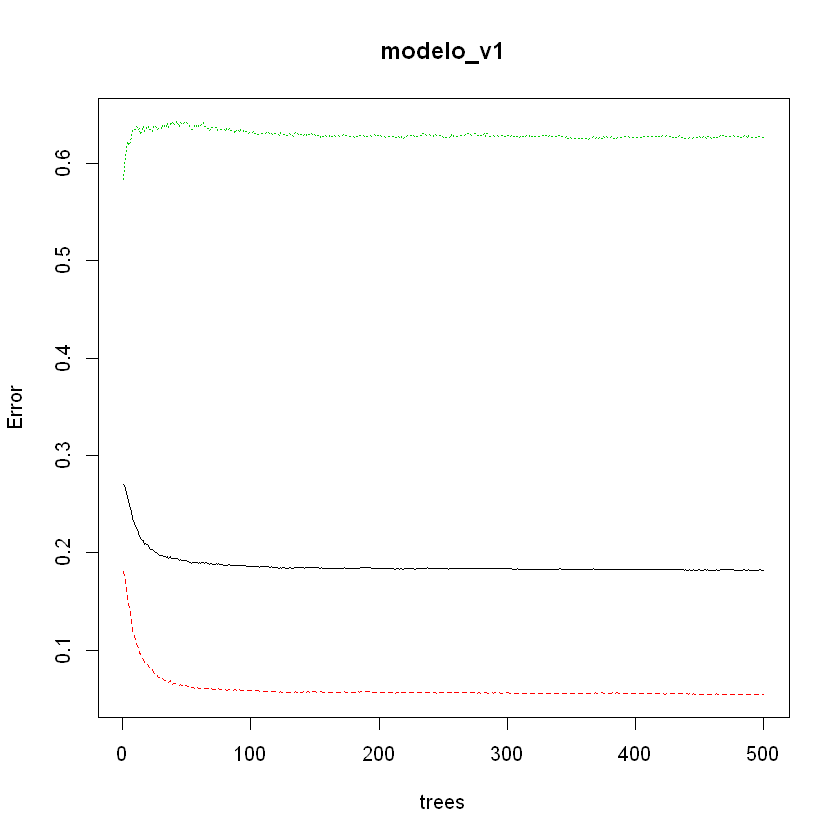

In [60]:
# Avaliando o modelo
plot(modelo_v1)

In [61]:
# Previsões com dados de teste
previsoes_v1<- predict(modelo_v1, df_teste)

In [62]:
# Construindo uma matrix de confusão
cm_v1<- caret::confusionMatrix(previsoes_v1,
                               df_teste$DEFAULTING,
                              positive="1")

In [63]:
# Visualizando a matrix de confusão
cm_v1

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5443 1055
         1  318  597
                                          
               Accuracy : 0.8148          
                 95% CI : (0.8058, 0.8236)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 1.01e-15        
                                          
                  Kappa : 0.3641          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.36138         
            Specificity : 0.94480         
         Pos Pred Value : 0.65246         
         Neg Pred Value : 0.83764         
             Prevalence : 0.22285         
         Detection Rate : 0.08053         
   Detection Prevalence : 0.12343         
      Balanced Accuracy : 0.65309         
                                          
       'Positive' Class : 1               
                        

In [64]:
# Definindo valores de y e y_pred
y<- df_teste$DEFAULTING
y_pred_v1<- previsoes_v1

In [65]:
# Calculando Precision
precision<- posPredValue(y_pred_v1,y)
precision

[1] 0.8376424

In [66]:
# Calculando recall
recall<- sensitivity(y_pred_v1,y)
recall

[1] 0.9448012

In [67]:
# Calculando F1-Score
F1<- (2 * precision * recall) / (precision + recall)
F1

[1] 0.8880007

**2. Segundo Modelo**
- Realizando um balanceamento da variável dependente.

In [68]:
# Set seed
set.seed(9560)

In [69]:
# Balanceamento de classe
df_treino_bal<- SMOTE(DEFAULTING ~.,df_treino)

In [70]:
# Visualizar proporção variável dependente - Defaulting balanceada
prop.table(table(df_treino_bal$DEFAULTING))


        0         1 
0.5714286 0.4285714 

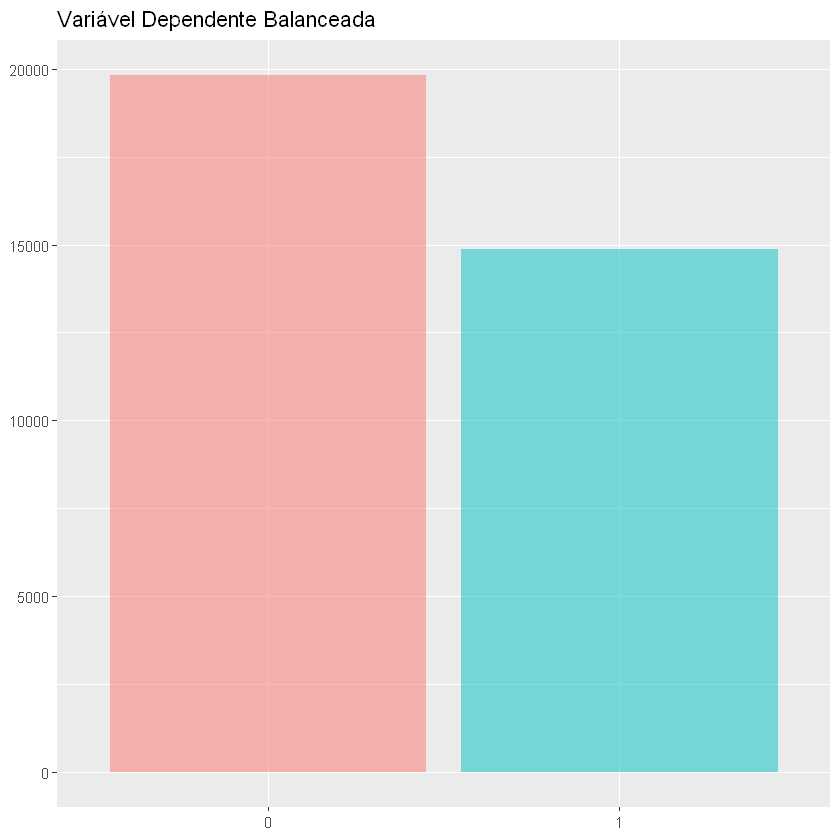

In [71]:
# Plotar variável dependente - Defaulting balanceada
df_treino_bal %>%
ggplot(aes(DEFAULTING,fill=DEFAULTING)) +
geom_bar(show.legend=F, alpha=.5) +
labs(title="Variável Dependente Balanceada", x=NULL, y=NULL)

In [72]:
# Segunda versão do modelo
modelo_v2<- randomForest(DEFAULTING ~., df_treino_bal)

In [73]:
# Ver modelo 2
modelo_v2


Call:
 randomForest(formula = DEFAULTING ~ ., data = df_treino_bal) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 10.05%
Confusion matrix:
      0     1 class.error
0 19010   822  0.04144816
1  2665 12209  0.17917171

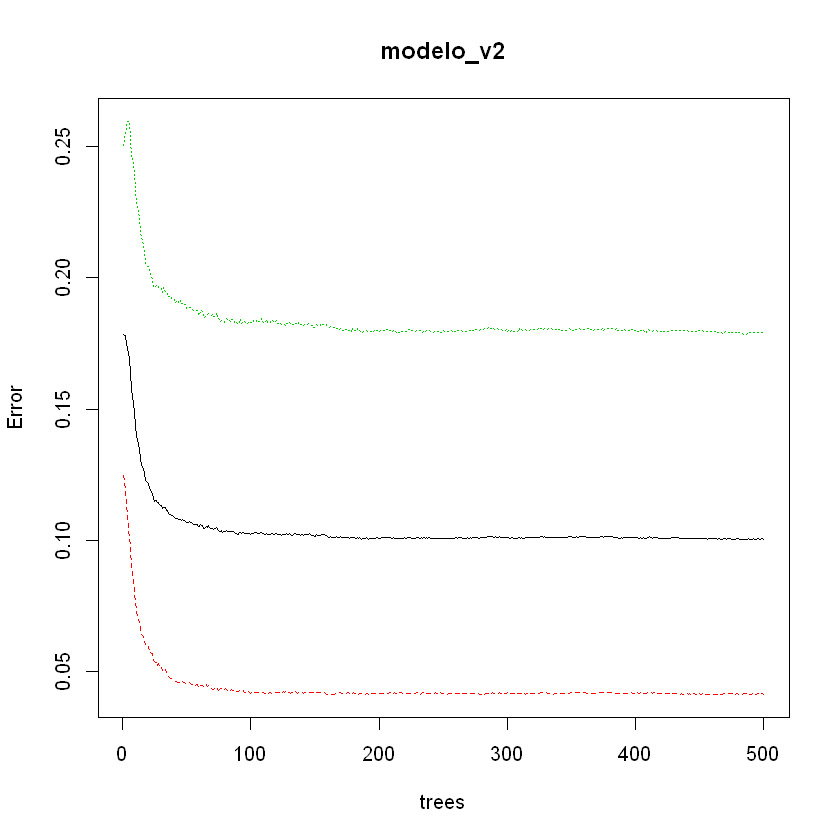

In [74]:
# Avaliando o modelo
plot(modelo_v2)

In [75]:
# Previsões com dados de teste
previsoes_v2<- predict(modelo_v2, df_teste)

In [76]:
# Construindo uma matrix de confusão
cm_v2<- caret::confusionMatrix(previsoes_v2,
                               df_teste$DEFAULTING,
                              positive="1")

In [77]:
# Visualizando a matrix de confusão
cm_v2

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5050  810
         1  711  842
                                         
               Accuracy : 0.7948         
                 95% CI : (0.7854, 0.804)
    No Information Rate : 0.7771         
    P-Value [Acc > NIR] : 0.0001189      
                                         
                  Kappa : 0.3947         
                                         
 Mcnemar's Test P-Value : 0.0119770      
                                         
            Sensitivity : 0.5097         
            Specificity : 0.8766         
         Pos Pred Value : 0.5422         
         Neg Pred Value : 0.8618         
             Prevalence : 0.2229         
         Detection Rate : 0.1136         
   Detection Prevalence : 0.2095         
      Balanced Accuracy : 0.6931         
                                         
       'Positive' Class : 1              
                                         

In [78]:
# Definindo valores de y e y_pred
y<- df_teste$DEFAULTING
y_pred_v2<- previsoes_v2

In [79]:
# Calculando Precision
precision2<- posPredValue(y_pred_v2,y)
precision2

[1] 0.8617747

In [80]:
# Calculando recall
recall2<- sensitivity(y_pred_v2,y)
recall2

[1] 0.8765839

In [81]:
# Calculando F1-Score
F2<- (2 * precision * recall) / (precision + recall)
F2

[1] 0.8880007

**3. Terceiro Modelo**
- Escolhendo as variáveis mais importantes do modelo.

In [82]:
# Obtendo as variáveis mais importantes
imp_var<- importance(modelo_v2)
varImportance<- data.frame(Variables=row.names(imp_var),
                          Importance=round(imp_var[,"MeanDecreaseGini"],2))

In [83]:
# Criando rank de variáveis segundo importância
rankImportance<- varImportance %>%
mutate(Rank= paste0("#", dense_rank(desc(Importance))))

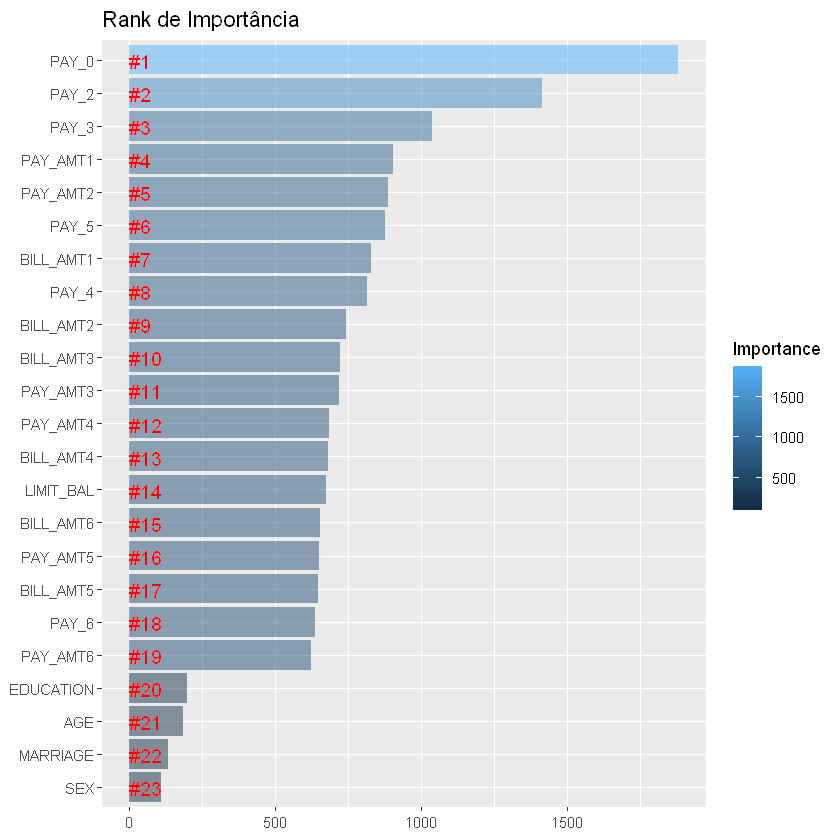

In [84]:
# Plotar importância relativa
rankImportance %>%
ggplot(aes(reorder(Variables, Importance),
          Importance,fill=Importance)) +
geom_bar(stat="identity", alpha=.5)+
geom_text(aes(Variables,0.5, label=Rank),
         hjust=0,vjust=0.55,size=4, colour="red") +
labs(title="Rank de Importância",x=NULL,y=NULL) +
coord_flip()

In [85]:
# Terceira versão do modelo
modelo_v3<- randomForest(DEFAULTING ~ PAY_0+PAY_2+PAY_3+PAY_AMT1+
                        PAY_AMT2+PAY_5+BILL_AMT1, df_treino_bal)

In [86]:
# Ver modelo 3
modelo_v3


Call:
 randomForest(formula = DEFAULTING ~ PAY_0 + PAY_2 + PAY_3 + PAY_AMT1 +      PAY_AMT2 + PAY_5 + BILL_AMT1, data = df_treino_bal) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 13.55%
Confusion matrix:
      0     1 class.error
0 18847   985   0.0496672
1  3718 11156   0.2499664

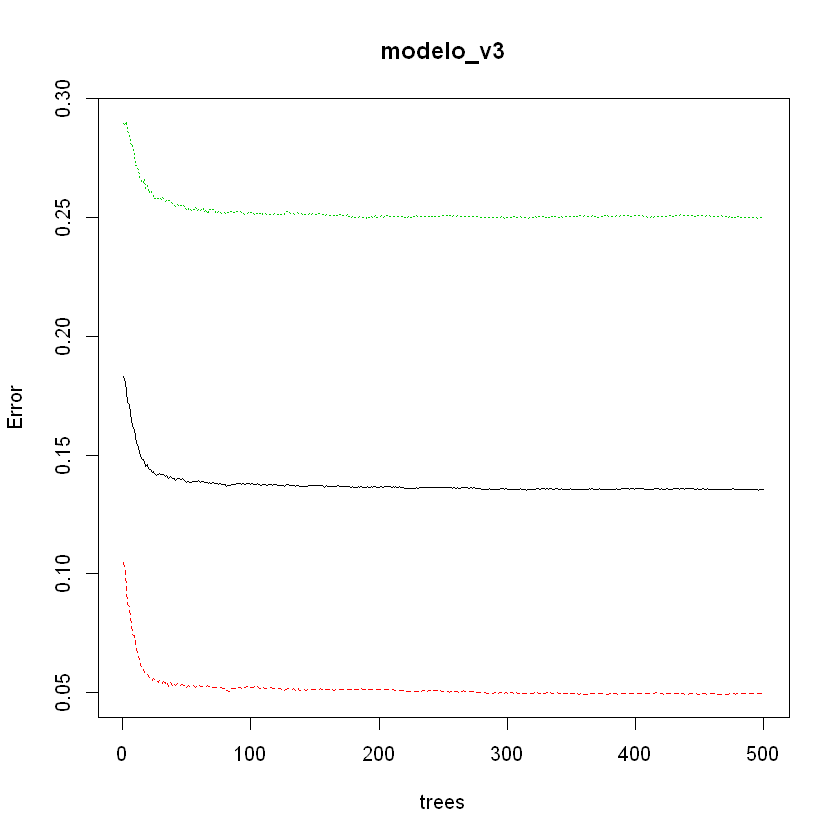

In [87]:
# Avaliando o modelo 3
plot(modelo_v3)

In [88]:
# Previsões com dados de teste
previsoes_v3<- predict(modelo_v3, df_teste)

In [89]:
# Construindo uma matrix de confusão
cm_v3<- caret::confusionMatrix(previsoes_v3,
                               df_teste$DEFAULTING,
                              positive="1")

In [90]:
# Visualizando a matrix de confusão
cm_v3

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 5203  950
         1  558  702
                                          
               Accuracy : 0.7966          
                 95% CI : (0.7872, 0.8057)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 2.61e-05        
                                          
                  Kappa : 0.3584          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4249          
            Specificity : 0.9031          
         Pos Pred Value : 0.5571          
         Neg Pred Value : 0.8456          
             Prevalence : 0.2229          
         Detection Rate : 0.0947          
   Detection Prevalence : 0.1700          
      Balanced Accuracy : 0.6640          
                                          
       'Positive' Class : 1               
                        

In [91]:
# Definindo valores de y e y_pred
y<- df_teste$DEFAULTING
y_pred_v3<- previsoes_v3

In [92]:
# Calculando Precision
precision3<- posPredValue(y_pred_v3,y)
precision3

[1] 0.8456038

In [93]:
# Calculando recall
recall3<- sensitivity(y_pred_v3,y)
recall3

[1] 0.9031418

In [94]:
# Calculando F1-Score
F3<- (2 * precision * recall) / (precision + recall)
F3

[1] 0.8880007

In [95]:
# Salvando o modelo final
saveRDS(modelo_v3, file="modelo_v3.rds")

### 3.2 PREVISÕES

In [96]:
# Dados dos clientes
PAY_0<- c(0,0,0)
PAY_2<- c(0,0,0)
PAY_3<- c(1,0,0)
PAY_AMT1<- c(1100,1000,1200)
PAY_AMT2<- c(1500,1300,1150)
PAY_5<- c(0,0,0)
BILL_AMT1<- c(350,420,280)

In [97]:
# Concatenando em um dataframe
novos_clientes<- data.frame(PAY_0,PAY_2,PAY_3,PAY_AMT1,PAY_AMT2,
                           PAY_5,BILL_AMT1)

In [98]:
# Convertendo as variáveis para fator
novos_clientes$PAY_0<- factor(novos_clientes$PAY_0,
                              levels=levels(df_treino_bal$PAY_0))
novos_clientes$PAY_2<- factor(novos_clientes$PAY_2,
                              levels=levels(df_treino_bal$PAY_2))
novos_clientes$PAY_3<- factor(novos_clientes$PAY_3,
                              levels=levels(df_treino_bal$PAY_3))
novos_clientes$PAY_5<- factor(novos_clientes$PAY_5,
                              levels=levels(df_treino_bal$PAY_5))


In [99]:
# Visualizar dataset
str(novos_clientes)

'data.frame':	3 obs. of  7 variables:
 $ PAY_0    : Factor w/ 11 levels "-2","-1","0",..: 3 3 3
 $ PAY_2    : Factor w/ 11 levels "-2","-1","0",..: 3 3 3
 $ PAY_3    : Factor w/ 11 levels "-2","-1","0",..: 4 3 3
 $ PAY_AMT1 : num  1100 1000 1200
 $ PAY_AMT2 : num  1500 1300 1150
 $ PAY_5    : Factor w/ 10 levels "-2","-1","0",..: 3 3 3
 $ BILL_AMT1: num  350 420 280


In [100]:
# Previsões
previsoes_novo_clientes<- predict(modelo_v3, novos_clientes)

In [101]:
# Visualizar as previsões
previsoes_novo_clientes

1 2 3 
1 0 0 
Levels: 0 1

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias